# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type
Total_rides_byCity =pd.DataFrame(pyber_data_df.groupby("type").count()["ride_id"])
Total_rides_byCity


,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [4]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# 2. Get the total drivers for each city type
Total_drivers_cities = pd.DataFrame(city_data_df.groupby("type").sum()["driver_count"])
Total_drivers_cities


,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [6]:
#  3. Get the total amount of fares for each city type
total_fare_byCity= pd.DataFrame(pyber_data_df.groupby("type").sum()["fare"])
total_fare_byCity


,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_citytype= pd.DataFrame(pyber_data_df.groupby("type").sum()["fare"]/pyber_data_df.groupby("type").count()["ride_id"])
average_fare_citytype

,0
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [8]:
# 5. Get the average fare per driver for each city type. 
average_fare_bydriver = pd.DataFrame(pyber_data_df.groupby("type").sum()["fare"]/city_data_df.groupby("type").sum()["driver_count"])
average_fare_bydriver


,0
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = Total_rides_byCity.join([Total_drivers_cities["driver_count"],total_fare_byCity["fare"]])
pyber_summary_df.head()



,ride_id,driver_count,fare
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [10]:
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["fare"]/pyber_summary_df["ride_id"]
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["fare"]/pyber_summary_df["driver_count"]


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [12]:
pyber_summary_df.head()

,ride_id,driver_count,fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#  8. Format the columns.
pyber_summary_df["ride_id"]=pyber_summary_df["ride_id"].map("{:,}".format)
pyber_summary_df["driver_count"]=pyber_summary_df["driver_count"].map("{:,}".format)
pyber_summary_df["fare"]=pyber_summary_df["fare"].map("${:,}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)


In [14]:
pyber_summary_df.head()

,ride_id,driver_count,fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# Print the merged DataFrame for reference.
pyber_data_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_df = pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum()["fare"])
new_df.head()


fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [17]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_df = new_df.reset_index()


In [19]:
# pivot table with index = "date" , columns="type" and values ="fare"
new2_df = new_df.pivot(index="date", columns="type", values="fare")
new2_df.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [20]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
new3_df =new2_df.loc['2019-01-01':'2019-04-28']
new3_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [21]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new3_df.index = pd.to_datetime(new3_df.index)

In [22]:
# 6. Check that the datatype for the index is datetime using df.info()
new3_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [27]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resampled = new3_df.resample("W").sum()
resampled


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [32]:
resampled.describe()

type,Rural,Suburban,Urban
count,17.000000,17.000000,17.000000
mean,230.217059,1040.860588,2161.000000
std,113.517344,171.878829,222.800874
min,67.650000,721.600000,1661.680000
25%,175.140000,925.270000,2044.420000
50%,191.850000,1045.060000,2162.640000
75%,303.940000,1149.270000,2356.700000
max,501.240000,1412.740000,2470.930000


In [24]:
resampled.index.name = None

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter



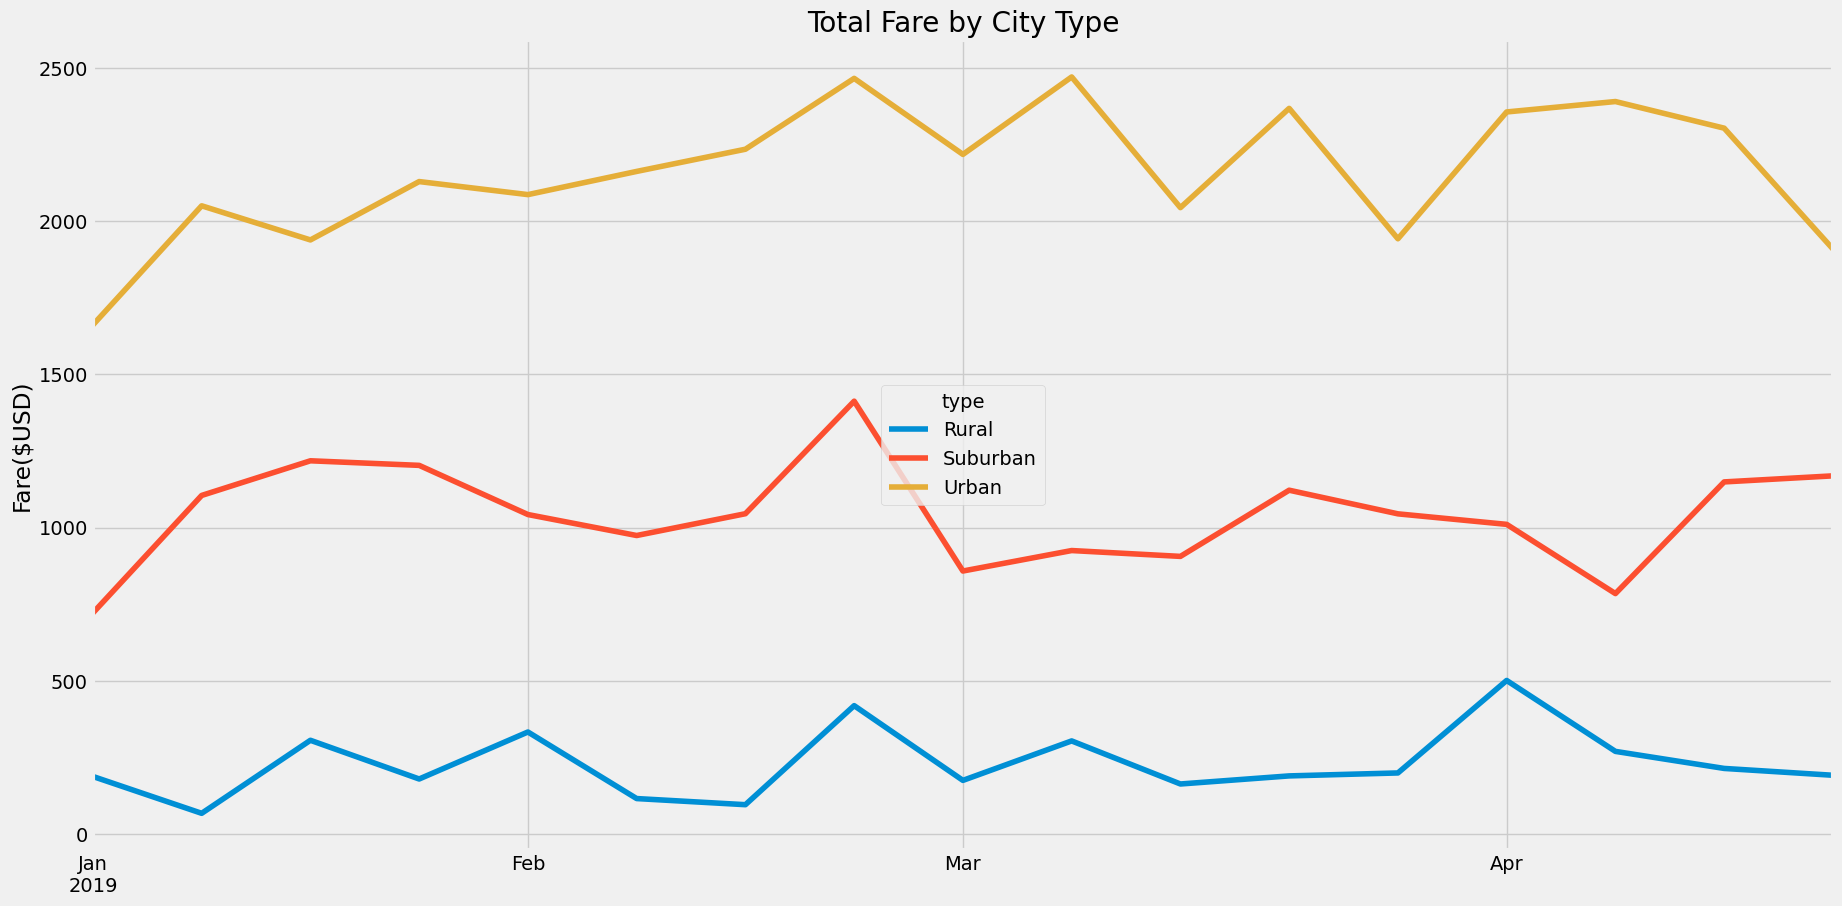

In [26]:

resampled.plot(figsize=(20,10))
plt.legend(loc="center", title="type")
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")
plt.savefig("PyBer_Fare_Sumamry.png")
plt.show()


In [33]:
pyber_summary_df

,ride_id,driver_count,fare,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


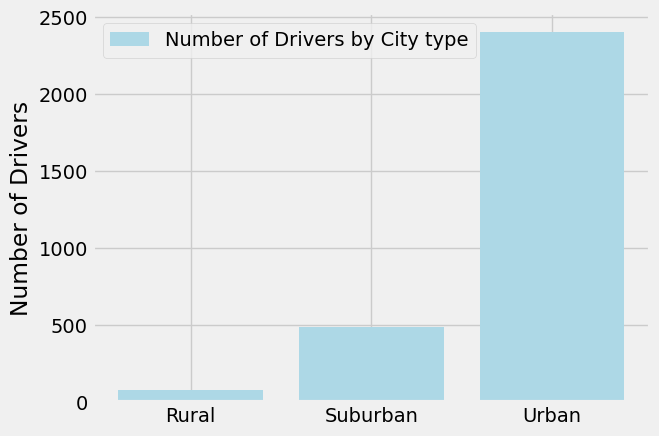

In [35]:
x =["Rural","Suburban","Urban"]
y=[78,490,2405]
plt.bar(x,y,color="lightblue",label="Number of Drivers by City type")
plt.ylabel("Number of Drivers")
plt.legend()
plt.show()

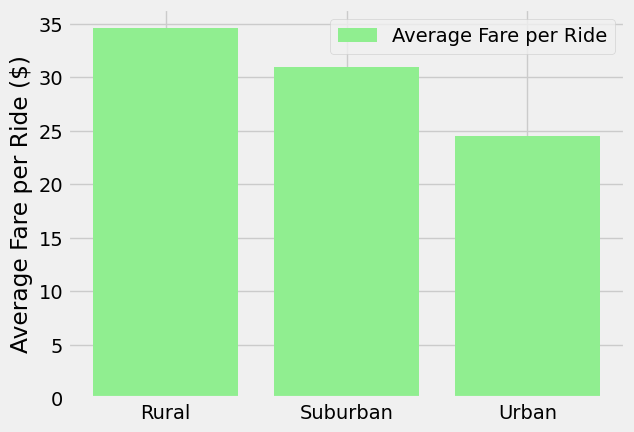

In [36]:
x =["Rural","Suburban","Urban"]
y=[34.62,30.97,24.53]
plt.bar(x,y,color="lightgreen",label="Average Fare per Ride")
plt.ylabel("Average Fare per Ride ($)")
plt.legend()
plt.show()

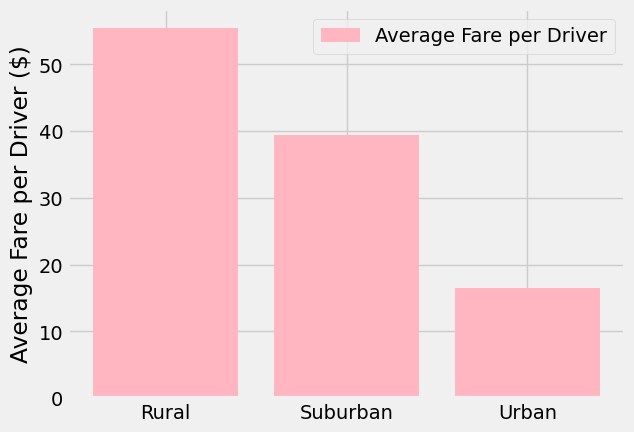

In [40]:
x =["Rural","Suburban","Urban"]
y=[55.49,39.50,16.57]
plt.bar(x,y,color="lightpink",label="Average Fare per Driver")
plt.ylabel("Average Fare per Driver ($)")
plt.legend()
plt.show()

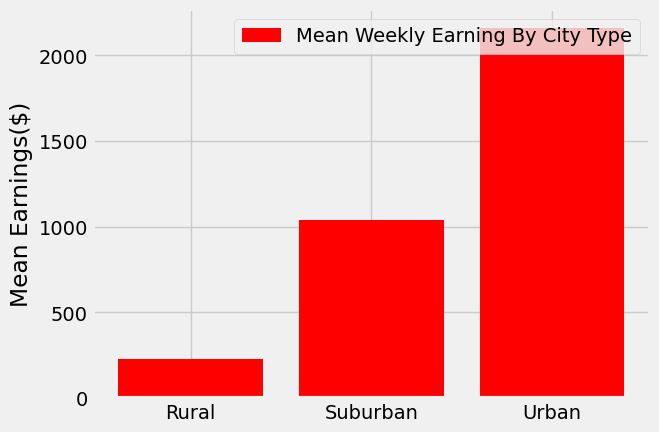

In [42]:
x =["Rural","Suburban","Urban"]
y=[230,1041,2161]
plt.bar(x,y,color="red",label="Mean Weekly Earning By City Type")
plt.ylabel("Mean Earnings($)")
plt.legend()
plt.show()